In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.constants as ct
from scipy import integrate
plt.style.use('default')
from matplotlib import lines
from matplotlib import collections  as mc
import seaborn as sns
# sns.set_theme()
# sns.set_style("whitegrid")

ValueError: X and Y must be the same size, but X.size is 400 and Y.size is 1600.

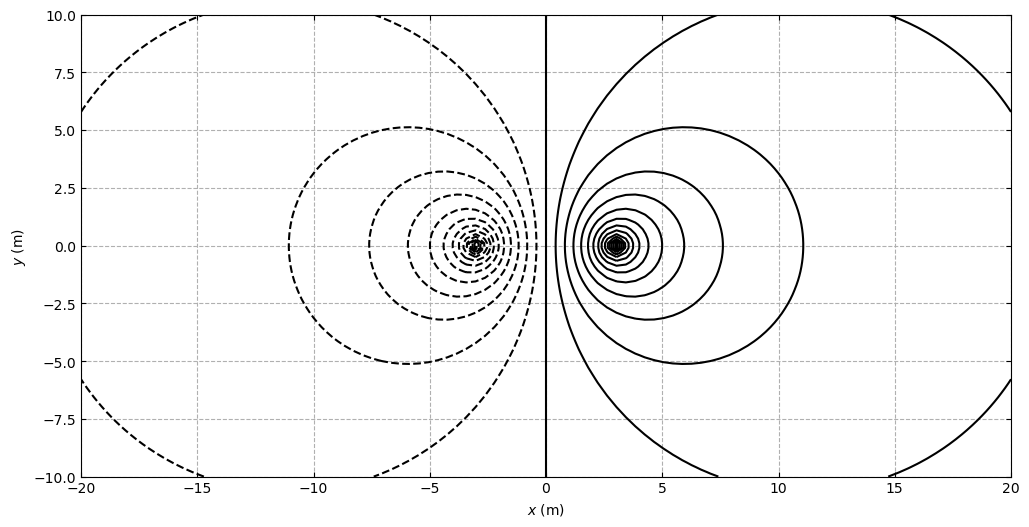

In [108]:
#Fils
def V2(x, y):
    r0=1
    L=1
    r=np.sqrt(x**2+y**2)
    V=L/(2*np.pi*ct.epsilon_0)*np.log(r0/r)

    return V
def V1(x, y):
    r0=1
    L=-1
    r=np.sqrt(x**2+y**2)
    V=L/(2*np.pi*ct.epsilon_0)*np.log(r0/r)

    return V
nx, ny = 100,100
a=10
b=20
d=3
x = np.linspace(-b, b, nx)
y = np.linspace(-a, a, ny)
X, Y = np.meshgrid(x, y)
Z1=V1(X+d,Y)
Z2=V2(X-d,Y)
#Gràfics

fig, ax = plt.subplots(figsize=(12, 6))


ax.contour(X,Y,Z1+Z2,30,colors='black')
ax.tick_params(direction='in',top="true",right='true')
ax.grid(linestyle='dashed')
ax.set_xlabel("$x$ (m)")
ax.set_ylabel("$y$ (m)")

# dx,dy=np.gradient(Z1+Z2)
# ax.quiver(X, Y, dx,dy,units='xy')

nnx=20
nny=20
xx = np.linspace(-b, b, nnx)
yy = np.linspace(-a, a, nny)


XX, YY = np.meshgrid(xx, yy)
ZZ1=V1(XX+d,YY)
ZZ2=V2(XX-d,YY)
dx,dy=np.gradient(ZZ1+ZZ2)

plt.quiver(XX, XY,dy,dx)

plt.show()
fig.savefig('fils.pdf')
# ax.grid?
# plt.tick_params(labeltop=True, labelright=True)


# plt.contour(X,Y,Z1+Z2,20,colors='black')
# plt.show()


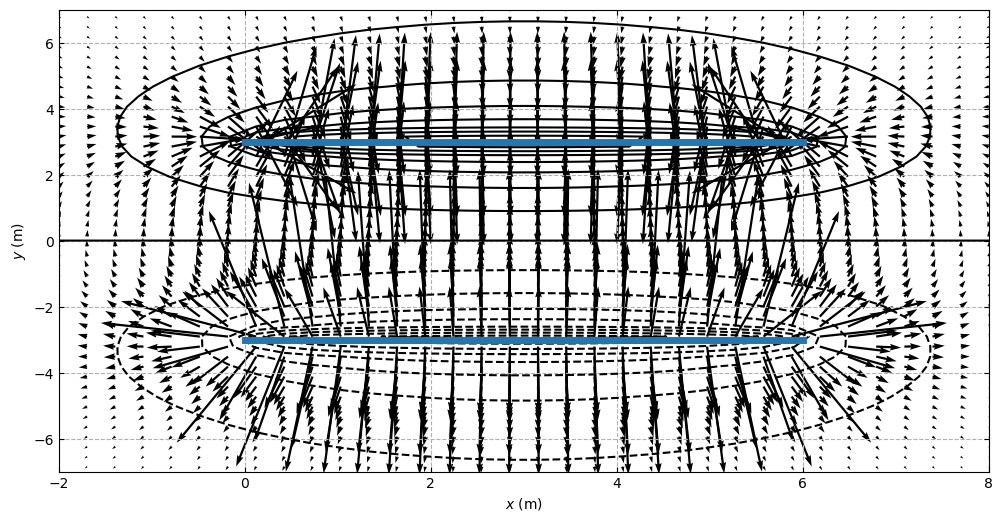

In [97]:
#Condensador
h=3
dd=6
# gg=0.01
L=1
k=1/(4*np.pi*ct.epsilon_0)
def aV1(x, y):
    V=integrate.quad(lambda d: k*L/(np.sqrt((x-d)**2+(y-h)**2)), 0, dd)
    return V[0]
def aV2(x, y):
    V=integrate.quad(lambda d: k*-L/(np.sqrt((x-d)**2+(y+h)**2)), 0, dd)
    return V[0]

nx=100
ny=nx
a=2*dd
# a=2
x = np.linspace(-a, a+dd, nx)
y = np.linspace(-a, a+dd, ny)
X, Y = np.meshgrid(x, y)

Vv1=np.vectorize(aV1)
Vv2=np.vectorize(aV2)

Z1=Vv1(X,Y)
Z2=Vv2(X,Y)
fig, ax = plt.subplots(figsize=(12, 6))


ax.contour(X,Y,Z1+Z2,15,colors='black')
aa=2
e=7
plt.xlim([-aa,dd+aa])
plt.ylim([-e,e])
# lines=[[(0,h),(dd,h)],(0,-h),(dd,-h)]
lines = [[(0, 1), (1, 1)], [(2, 3), (3, 3)], [(1, 2), (1, 3)]]
x=[0,dd]
y=[h,h]
y2=[-h,-h]

ax.plot(x,y,linewidth=5,color='tab:blue')
ax.plot(x,y2,linewidth=5,color='tab:blue')
# plt.xlim([-1,12])
# plt.ylim([-5,5])
ax.tick_params(direction='in',top="true",right='true')
ax.grid(linestyle='dashed')
ax.set_xlabel("$x$ (m)")
ax.set_ylabel("$y$ (m)")


Ex,Ey=np.gradient(Z1+Z2)
ax.quiver(X,Y,Ey,Ex)


plt.show()
fig.savefig('cond.pdf')
# Z1=V(X,Y)
# d=1
# Z2=V(X,Y-1)
#Gràfics

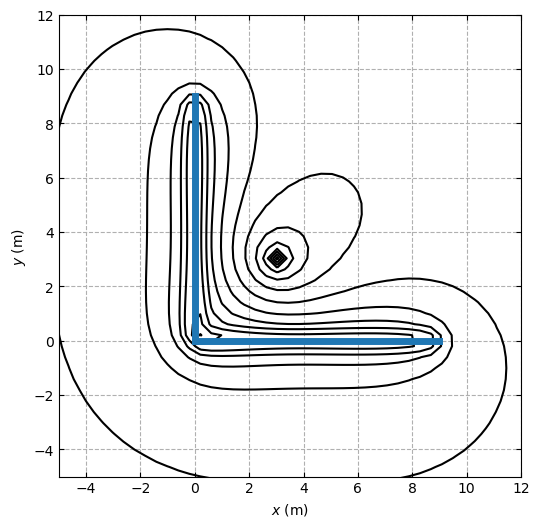

In [75]:
#Condensador
h=0
dd=9
# gg=0.01
L=1
k=1/(4*np.pi*ct.epsilon_0)
def hV1(x, y):
    V=integrate.quad(lambda d: k*L/(np.sqrt((x-d)**2+(y-h)**2)), 0, dd)
    return V[0]
def vV2(x, y):
    V=integrate.quad(lambda d: k*L/(np.sqrt((x)**2+(y-d)**2)), 0, dd)
    return V[0]

def fV(x, y):
    r0=1
    L=1
    r=np.sqrt(x**2+y**2)
    V=-L/(2*np.pi*ct.epsilon_0)*np.log(r0/r)

    return V

nx=100
ny=nx
x = np.linspace(-20, 20, nx)
y = np.linspace(-20,20, ny)
X, Y = np.meshgrid(x, y)

Vh=np.vectorize(hV1)
Vv=np.vectorize(vV2)
ffV=np.vectorize(fV)

m=3

Z1=Vh(X,Y)
Z2=Vv(X,Y)
Z3=ffV(X-m,Y-m)
fig, ax = plt.subplots(figsize=(12, 6))

# ax.scatter([3],[3],s=150,color='tab:red')

ax.contour(X,Y,Z1+Z2+Z3,15,colors='black')
aa=3
e=6
plt.xlim([-5,12])
plt.ylim([-5,12])

ax.plot([0,dd],[0,0],linewidth=5,color='tab:blue')
ax.plot([0,0],[0,dd],linewidth=5,color='tab:blue')


ax.set_aspect('equal', 'box')
ax.tick_params(direction='in',top="true",right='true')
ax.grid(linestyle='dashed')
ax.set_xlabel("$x$ (m)")
ax.set_ylabel("$y$ (m)")
plt.show()
fig.savefig('custom.pdf')
# lines=[[(0,h),(dd,h)],(0,-h),(dd,-h)]
# lines = [[(0, 1), (1, 1)], [(2, 3), (3, 3)], [(1, 2), (1, 3)]]
# x=[0,dd]
# y=[h,h]
# y2=[-h,-h]

# ax.plot(x,y)
# ax.plot(x,y2)

# Z1=V(X,Y)
# d=1
# Z2=V(X,Y-1)
#Gràfics

Building jupyterlab assets (production, minimized)
An error occured.
RuntimeError: JupyterLab failed to build
See the log file for details:  /tmp/jupyterlab-debug-9hign88m.log


In [5]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK
